In this mission, we'll be learning about the **chi-squared** test for categorical data. This test enables us to determine the statistical significance of observing a set of categorical values.

The chi-squared test enables us to quantify the difference between sets of observed and expected categorical values.

In [1]:
import pandas as pd
income = pd.read_csv('income.csv')
income.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
income['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

Although the ration of men and women in usa is 50%, the above values look off.

### Propotional difference
One way that we can determine the differences between observed and expected values is to compute simple proportional differences.

(observed-expected)/expected

In [5]:
female_diff = (10771 - 16280.5) / 16280.5
print(female_diff)

male_diff = (21790 - 16280.5) / 16280.5
print(male_diff)

-0.33841098246368356
0.33841098246368356


### Chi-Squared Value
What we really want to find is one number that can tell us how much all of our observed counts deviate from all of their expected counterparts. This will let us figure out if our difference in counts is statistically significant.

```((obvserved - expected) ** 2) / expected```

In [7]:
def chi_sq(observed, expected):
    return ((observed - expected) ** 2) / expected

female_diff = chi_sq(10771, 16280.5)

male_diff = chi_sq(21790, 16280.5)

gender_chisq = male_diff + female_diff
gender_chisq

3728.950615767329

In [8]:
income.shape[0]

32561

(array([ 687.,  159.,   80.,   28.,   23.,    7.,    9.,    3.,    2.,    2.]),
 array([  3.07115875e-05,   9.80418292e-01,   1.96080587e+00,
          2.94119345e+00,   3.92158103e+00,   4.90196861e+00,
          5.88235619e+00,   6.86274377e+00,   7.84313135e+00,
          8.82351893e+00,   9.80390651e+00]),
 <a list of 10 Patch objects>)

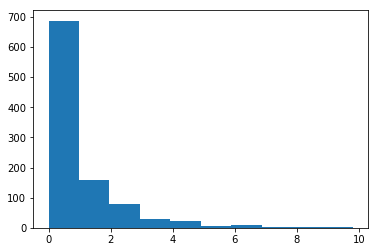

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
chi_squared_values = []

for i in range(1000):
    male_count = 0
    female_count = 0
    for r in np.random.rand(32561):
        if r < 0.5:
            male_count += 1
        else:
            female_count += 1
    
    male_diff = chi_sq(male_count, 16280.5)
    female_diff = chi_sq(female_count, 16280.5)
    chi_squared_values.append(male_diff + female_diff)
    
plt.hist(chi_squared_values)

In [12]:
female_diff = chi_sq(107.71, 162.805)
male_diff = chi_sq(217.90, 162.805)

gender_chisq = male_diff + female_diff
gender_chisq

37.2895061576733

(array([ 735.,  160.,   66.,   14.,   14.,    4.,    4.,    1.,    1.,    1.]),
 array([  0. ,   1.2,   2.4,   3.6,   4.8,   6. ,   7.2,   8.4,   9.6,
         10.8,  12. ]),
 <a list of 10 Patch objects>)

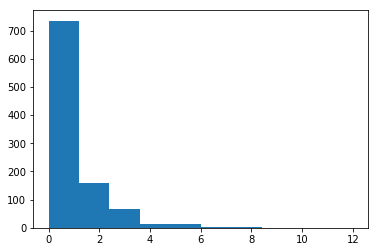

In [14]:
chi_squared_values = []

for i in range(1000):
    male_cnt = 0
    female_cnt = 0
    rand = np.random.rand(300)
    for r in rand:
        if r < 0.5:
            male_cnt += 1
        else:
            female_cnt += 1
    male_diff = chi_sq(male_cnt, 150)
    female_diff = chi_sq(female_cnt, 150)
    chi_squared_values.append(male_diff + female_diff)

plt.hist(chi_squared_values)

### Degree of Freedom
A degree of freedom is the number of values that can vary without the other values being "locked in".

In [16]:
col = ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']

white_chi_sq = chi_sq(27816, 26146.5)
black_chi_sq = chi_sq(3124, 3939.9)
asian_chi_sq = chi_sq(1039, 944.3)
amer_indian = chi_sq(311, 260.5)
others = chi_sq(271, 1269.8)

race_chisq = white_chi_sq + black_chi_sq + asian_chi_sq + amer_indian + others

race_chisq

1080.485936593381

In [18]:
from scipy.stats import chisquare
import numpy as np

observed = np.array([27816, 3124, 1039, 311, 271])
expected = np.array([26146.5, 3939.9, 944.3, 260.5, 1269.8])

race_chisq_value, race_pvalue = chisquare(observed, expected)
race_pvalue

1.2848494674873035e-232

### Multiple Categories
Multiple Categories chi square test

In [20]:
from scipy.stats import chisquare
import numpy as np
#values for gendere vs income
expected = np.array([5249.8, 16533.5, 2597.4, 8180.3])
observed = np.array([6662, 15128, 1179, 9592])

chisq_gender_income, p_gender_value = chisquare(observed, expected)
chisq_gender_income

1517.5510981525106

In [21]:
p_gender_value

0.0

In [22]:
import pandas as pd
table = pd.crosstab(income['sex'], [income['race']])
print(table)


race      Amer-Indian-Eskimo   Asian-Pac-Islander   Black   Other   White
sex                                                                      
 Female                  119                  346    1555     109    8642
 Male                    192                  693    1569     162   19174


In [24]:
from scipy.stats import chi2_contingency

chisq_value, pvalue_gender_race, degree_freedom, expected = chi2_contingency(table)
pvalue_gender_race

5.1920613027604561e-97

### Cavets
Now that we've learned the chi-squared test, you should be able to figure out if the association between two columns of categorical data is statistically significant or not. There are a few caveats to using the chi-squared test that are important to cover, though:

 * Finding that a result isn't significant doesn't mean that no association between the columns exists. For instance, if we found that the chi-squared test between the sex and race columns returned a p-value of .1, it wouldn't mean that there is no relationship between sex and race. It just means that there isn't a statistically significant relationship.
 * Finding a statistically significant result doesn't imply anything about what the correlation is. For instance, finding that a chi-squared test between sex and race results in a p-value of .01 doesn't mean that the dataset contains too many Females who are White (or too few). A statistically significant finding means that some evidence of a relationship between the variables exists, but needs to be investigated further.
 * Chi-squared tests can only be applied in the case where each possibility within a category is independent. For instance, the Census counts individuals as either Male or Female, not both.
 * Chi-squared tests are more valid when the numbers in each cell of the cross table are larger. So if each number is 100, great -- if each number is 1, you may need to gather more data.

